### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [9]:
#Creamos una función para calcular la facturación total de cada tienda
def facturacion(ej1): #ej1 es la representación de 'ejercicio 01' y es el espacio que usaremos para insertar cada tienda (dataframe convertido a variable)
    sumaDePrecios = ej1['Precio'].sum() #Lo que hace esta línea de código es sumar todos los valores de una determinada columna, en este caso 'Precio'
    return sumaDePrecios
#Ponemos en funcionamiento nuestra función aplicandolo en cada Tienda, de la 1 a la 4
f1= facturacion(tienda)
f2= facturacion(tienda2)
f3= facturacion(tienda3)
f4= facturacion(tienda4)

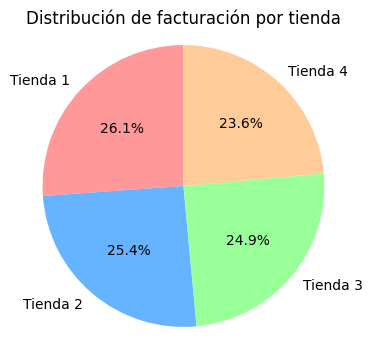

In [28]:
#Todo lo que viene a continuación es para realizar el Diagrama Pastel
facturaciones = [f1, f2, f3, f4] #'facturaciones' es una variable que contienen los datos de la funcion aplicada a las 4 tiendas que realizamos anteriormente
etiquetas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'] #Son los enunciados que usaremos para cada porcentaje del diagrama, asi reconocemos a cual de las 4 tiendas se refiere
#Lo demás son ajuste básicos, casi por default en el diagrama
plt.figure(figsize=(4, 4))
plt.pie(facturaciones, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribución de facturación por tienda')
plt.axis('equal')
plt.show()

# 2. Ventas por categoría

In [26]:
#En este siguiente caso, vamos a encapsular todo en 1 misma función, primero...
def cat_popular(ej2, nombre_tienda): #definimos nuestra función, 'ej2' representa al 'ejercicio 02' que estamos realizando, y a diferencia del ejercicio anterior tomaremos un valor extra, que nos requiere el nombre de la Tienda a la que se aplicará la función
  conteo_categorias = ej2['Categoría del Producto'].value_counts() #esta línea de código hace el conteo de toda la columna 'Categoría del Producto' en este caso, y en caso lo dejaramos así nos devolvería todos los elementos en orden jerarquico, del mas mencionado, hasta el menos mencionado
  conteofinal = conteo_categorias.nlargest(3) #como ya tenemos el conteo de los elementos, con la siguiente línea de código seleccionamos los 3 más mencionados, en este caso para hallar 'Las 3 categorias mas populares' de cada tienda
#El siguiente código es algo básico para la creación del diagrama
  plt.figure(figsize=(5, 5))
  plt.bar(conteofinal.index, conteofinal.values, color='#ff9999', edgecolor='black')
  plt.title(f'Frecuencia de productos por categoría - {nombre_tienda}')
  plt.xlabel('Categoría del Producto')
  plt.ylabel('Cantidad de productos')
  plt.xticks(rotation=45)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

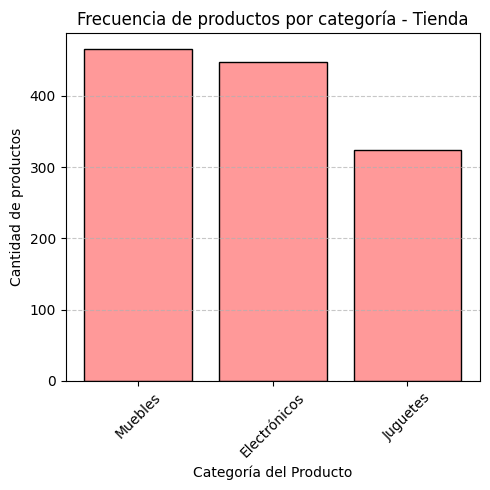

-----------------------------------------------------------------


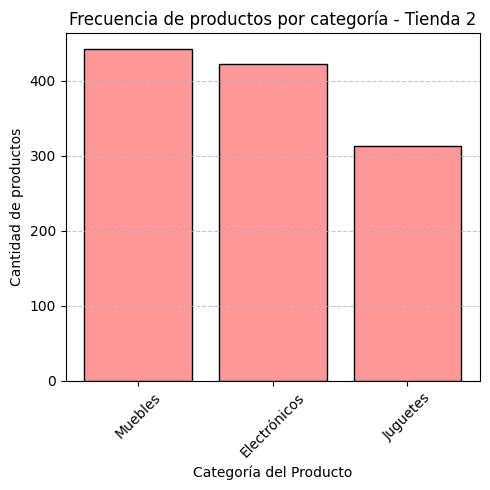

-----------------------------------------------------------------


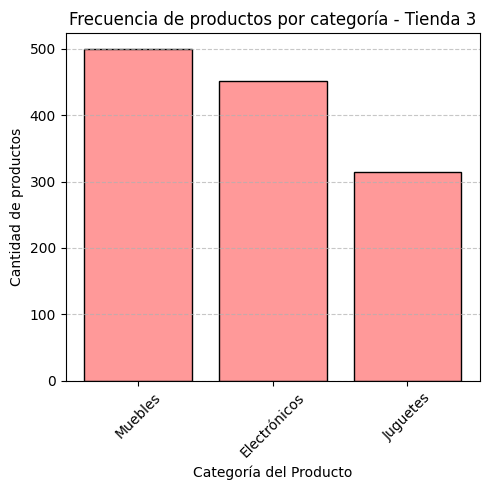

-----------------------------------------------------------------


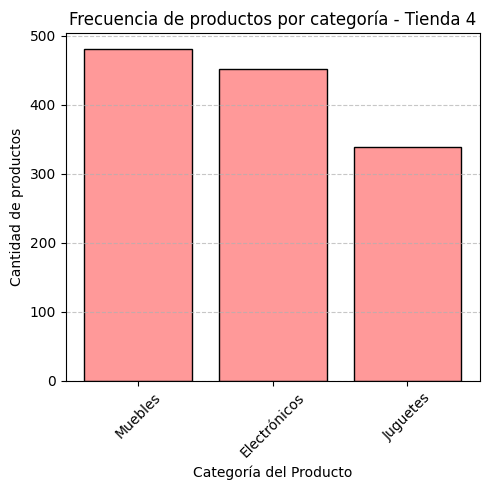

In [27]:
#Aquí ya es solo una puesta en marcha de la función creada, aplicada en cada tienda
cat_popular(tienda, 'Tienda')
print('-----------------------------------------------------------------')
cat_popular(tienda2, 'Tienda 2')
print('-----------------------------------------------------------------')
cat_popular(tienda3, 'Tienda 3')
print('-----------------------------------------------------------------')
cat_popular(tienda4, 'Tienda 4')

# 3. Calificación promedio de la tienda


In [4]:
def promCalificacion(ej3):#definimos la función, le asignamos ej3 por el tema del 'ejercicio 03' que estamos trabajando
  sumCalifiaciones = ej3['Calificación'].sum() #línea de código para hacer la suma de elementos de la columna 'Calificación'
  cantCalifiaciones = ej3['Calificación'].count() #línea de código para hacer el conteo de elementos de la columna 'Calificación'
  promedio = sumCalifiaciones / cantCalifiaciones #de las dos líneas de código anteriores, vamos a hallar el promedio de Calificación (satisfacción) de los clientes de todas las tiendas
  promFinal = round(promedio, 2) #para evitar un resultado con muchos decimales, implementamos esta línea de código, reduciendo los decimales en el resultado a 2 cifras, despúes de la coma
  return(promFinal)
#Ponemos en marcha la función
pc = promCalificacion(tienda)
pc2 = promCalificacion(tienda2)
pc3 = promCalificacion(tienda3)
pc4 = promCalificacion(tienda4)

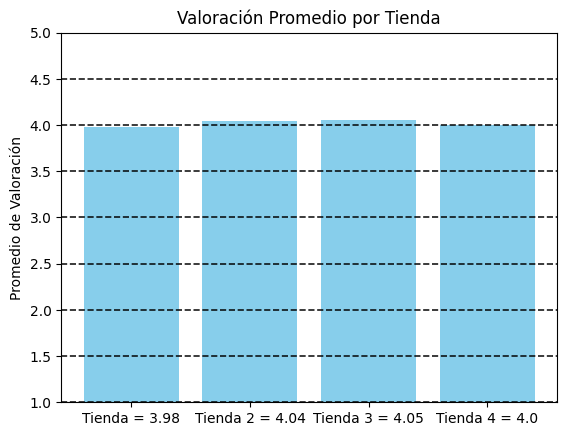

In [25]:
#Nos encargamos de rellenar información para nuestro diagrama
tiendas = [f'Tienda = {pc}', f'Tienda 2 = {pc2}', f'Tienda 3 = {pc3}', f'Tienda 4 = {pc4}'] #ponemos nuestro enunciado de cada tienda y su respectiva equivalencia respecto a su califiación promedio, en este caso lo hacemos porque no se distingue muy bien en las barras del diagrama
valoraciones = [pc, pc2, pc3, pc4] #llamamos a las funciones que hallamos anteriormente, muy importante en nuestro diagrama
#Ajuste básico para el diagrama
plt.bar(tiendas, valoraciones, color='skyblue')
plt.ylim(1, 5)
plt.ylabel('Promedio de Valoración')
plt.title('Valoración Promedio por Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.9, linewidth=1.2, color='black')
plt.show()

# 4. Productos más y menos vendidos

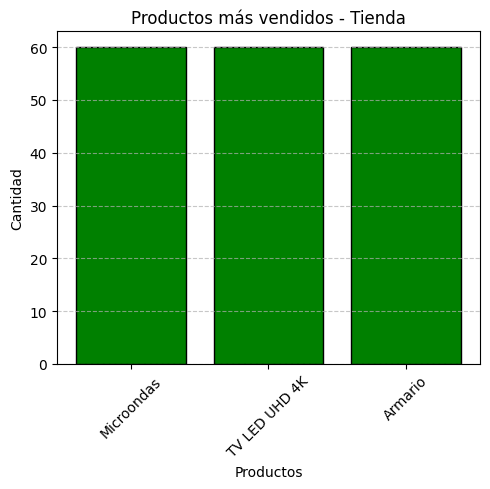

-----------------------------------------------------------------


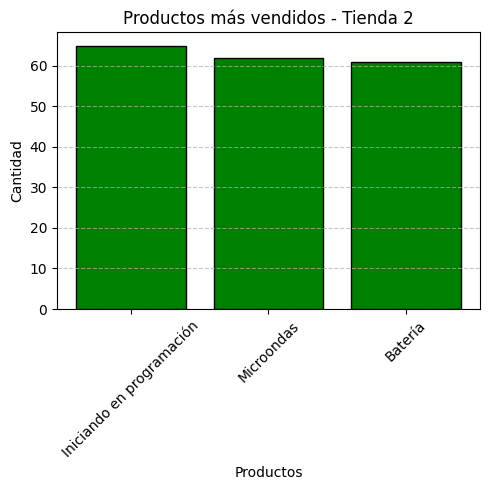

-----------------------------------------------------------------


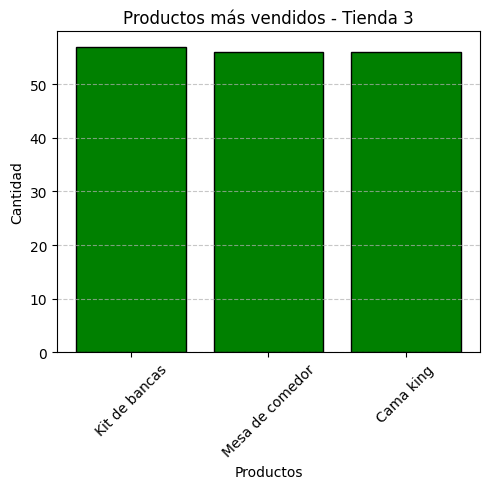

-----------------------------------------------------------------


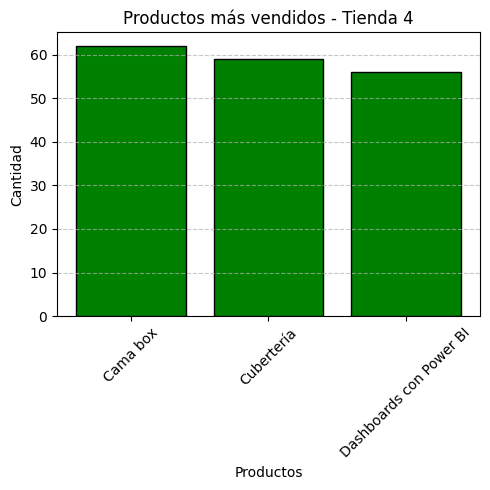

In [24]:
# PRODUCTOS MÁS VENDIDOS
def productoMas_vendido(ej41, nombre_tienda):
  contadorProd_mas = ej41['Producto'].value_counts()
  prodMas_vendidos = contadorProd_mas.nlargest(3)


  plt.figure(figsize=(5, 5))
  plt.bar(prodMas_vendidos.index, prodMas_vendidos.values, color='green', edgecolor='black')
  plt.title(f'Productos más vendidos - {nombre_tienda}')
  plt.xlabel('Productos')
  plt.ylabel('Cantidad')
  plt.xticks(rotation=45)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

productoMas_vendido(tienda, 'Tienda')
print('-----------------------------------------------------------------')
productoMas_vendido(tienda2, 'Tienda 2')
print('-----------------------------------------------------------------')
productoMas_vendido(tienda3, 'Tienda 3')
print('-----------------------------------------------------------------')
productoMas_vendido(tienda4, 'Tienda 4')


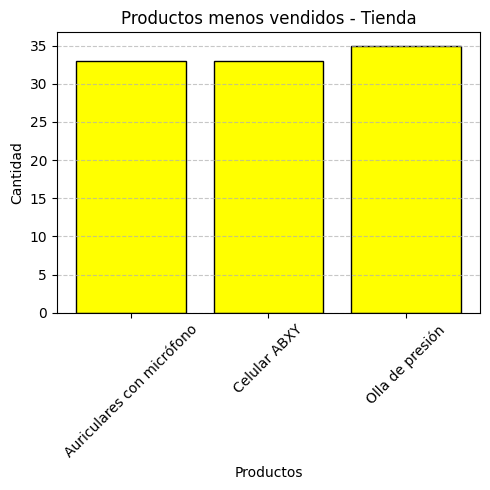

-----------------------------------------------------------------


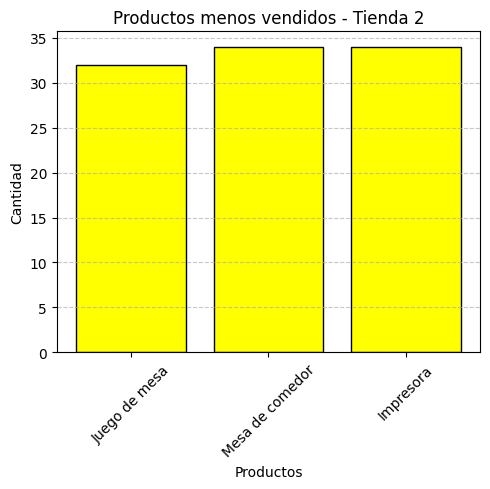

-----------------------------------------------------------------


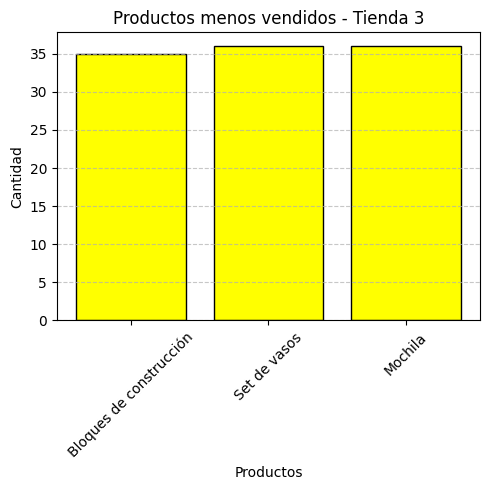

-----------------------------------------------------------------


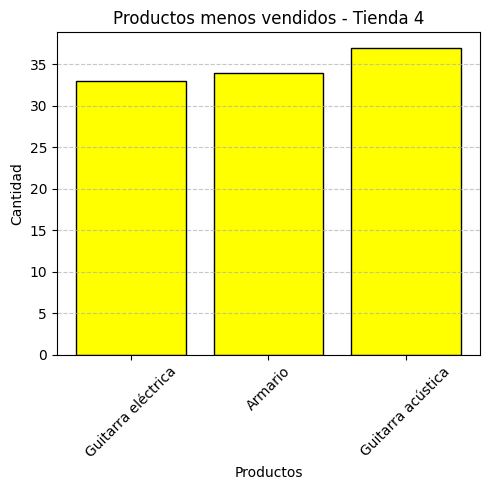

In [23]:
# PRODUCTOS MENOS VENDIDOS
def productoMenos_vendido(ej42, nombre_tienda):
  contadorProd_menos = ej42['Producto'].value_counts()
  prodMns_vendidos = contadorProd_menos.nsmallest(3)


  plt.figure(figsize=(5, 5))
  plt.bar(prodMns_vendidos.index, prodMns_vendidos.values, color='yellow', edgecolor='black')
  plt.title(f'Productos menos vendidos - {nombre_tienda}')
  plt.xlabel('Productos')
  plt.ylabel('Cantidad')
  plt.xticks(rotation=45)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

productoMenos_vendido(tienda, 'Tienda')
print('-----------------------------------------------------------------')
productoMenos_vendido(tienda2, 'Tienda 2')
print('-----------------------------------------------------------------')
productoMenos_vendido(tienda3, 'Tienda 3')
print('-----------------------------------------------------------------')
productoMenos_vendido(tienda4, 'Tienda 4')

# 5. Envío promedio por tienda

In [17]:
def promedio_envio(ej5):
  sumCostosEnvio = ej5['Costo de envío'].sum()
  columEnvio = ej5['Costo de envío'].count()
  promEnvio = sumCostosEnvio / columEnvio
  promEnvioFinal = round(promEnvio, 2)
  return(promEnvioFinal)

pe = promedio_envio(tienda)
pe2 = promedio_envio(tienda2)
pe3 = promedio_envio(tienda3)
pe4 = promedio_envio(tienda4)

26018.61


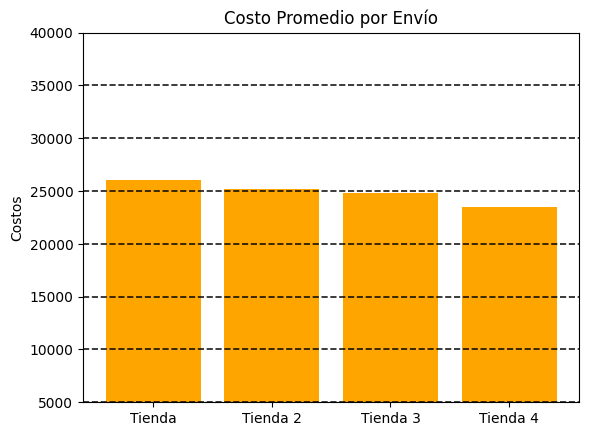

In [22]:
tiendas = ['Tienda', 'Tienda 2', 'Tienda 3', 'Tienda 4']
valoraciones = [pe, pe2, pe3, pe4]

plt.bar(tiendas, valoraciones, color='orange')
plt.ylim(5000, 40000)
plt.ylabel('Costos')
plt.title('Costo Promedio por Envío')
plt.grid(axis='y', linestyle='--', alpha=0.9, linewidth=1.2, color='black')
plt.show()

# **CONCLUSION FINAL RESPECTO AL ANALISIS DE LAS TIENDAS**

Vamos a valorizar cada aspecto de cada tienda, puntuando del 1 al 4 (la tienda mas valorada recibe 4 puntos y la menos valorada 1 punto), en este caso no usaremos los 5 puntos de análisis hallados anteriormente, según mi criterio usaremos:

In [ ]:
'''
1. Análisis de Facturación
2. Calificación Promedio de la Tienda
3. Envio promedio por Tienda

1. Análisis de Facturación
Tienda 1 = 4 pnts
Tienda 2 = 3 pnts
Tienda 3 = 2 pnts
Tienda 4 = 1 pnts

2. Calificación Promedio de la Tienda
Tienda 1 = 1 pnts
Tienda 2 = 3 pnts
Tienda 3 = 4 pnts
Tienda 4 = 2 pnts

3. Envío promedio por Tienda
Tienda 1 = 1 pnts
Tienda 2 = 2 pnts
Tienda 3 = 3 pnts
Tienda 4 = 4 pnts

TOTALES
Tienda 1 = 6 pnts
Tienda 2 = 8 pnts
Tienda 3 = 9 pnts
Tienda 4 = 7 pnts
'''

Conclusión: Yo concluyo que, según el análisis anterior, la Tienda 1, es la que debería ser ofertada, ya que en rango de ganancias es la mejor, pero si le restamos aspectos como costo de envio o califiación de sus clientes, nos deja a la Tienda 1 en el último lugar, por lo que concluyo y reitero, la Tienda 1 es la que debe ser vendida.